In [165]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import awkward as ak
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)

%matplotlib inline
np.set_printoptions(threshold=np.inf) 

In [166]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
#root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_sorted, times_sorted_TOF, charges_sorted, mpmt_sorted, event_number_branch = functions_spills.initial_treatment(tree)

In [167]:
#root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_sorted_sig, times_sorted_TOF_sig, charges_sorted_sig, mpmt_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)

In [168]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_sorted, 300, 5000, 4000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_sorted_sig, 300, 5000, 4000)

In [169]:
charge_branch_filtered = functions_spills.delete_indices_list(charges_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charges_sorted_sig, deleted_index_dict_sig)

times_TOF_filtered = functions_spills.delete_indices_list(times_sorted_TOF, deleted_index_dict)
times_TOF_filtered_sig = functions_spills.delete_indices_list(times_sorted_TOF_sig, deleted_index_dict_sig)

In [170]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 50, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 50, threshold = 5000)

In [171]:
times_TOF_filtered = functions_spills.delete_indices_list(times_TOF_filtered, deleted_indices)
times_TOF_filtered_sig = functions_spills.delete_indices_list(times_TOF_filtered_sig, deleted_indices_sig)

In [172]:
print(times_TOF_filtered[0][:10])
print(times_branch_modified_chargesTT[0][:10])

[ 353.57085834  478.00333567  702.40670894  721.08012573 2106.45938538
 2158.15177347 2909.09043655 3829.13518086 3836.38142506 3923.01567345]
[ 361.68167246  484.96778926  708.45884445  729.19093986 2113.24662246
 2162.07505332 2915.6588334  3839.84384063 3843.63759215 3929.36761738]


In [184]:
bin_hits = 5000  #dividing windows along 270000 ns
times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

t_RMS_TOF = np.zeros((tree.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_TOF_filtered, event_number_branch)):
    
    t_RMS_TOF[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)


t_RMS_sig_TOF = np.zeros((tree_sig.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_TOF_filtered_sig, event_number_branch_sig)):
    
    t_RMS_sig_TOF[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)

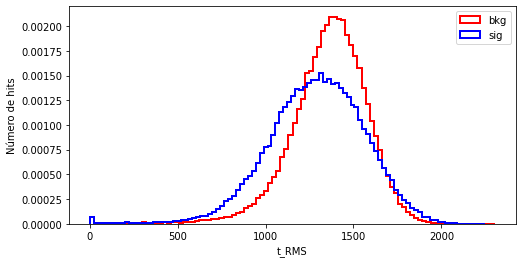

In [181]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS, bins=100, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(t_RMS_sig, bins=100, color='blue', histtype='step', linewidth=2, label='sig', density=True)
plt.xlabel('t_RMS')
plt.ylabel('Número de hits')
plt.legend()
#plt.yscale('log')
plt.show()

In [185]:
bin_hits = 5000  #dividing windows along 270000 ns
times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

t_RMS = np.zeros((tree.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_branch_modified_chargesTT, event_number_branch)):
    
    t_RMS[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)


t_RMS_sig = np.zeros((tree_sig.num_entries * len(times_array)))

for i, (times, event_number) in enumerate(zip(times_branch_modified_chargesTT_sig, event_number_branch_sig)):
    
    t_RMS_sig[i*len(times_array): (i+1)*len(times_array)] = functions_spills.time_RMS_fun(times, bin_hits)

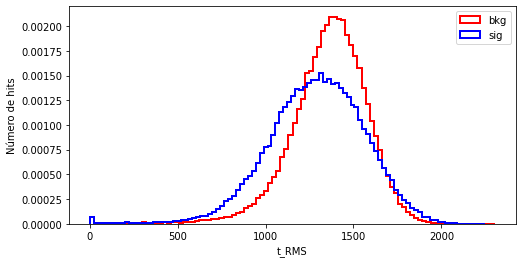

In [203]:
plt.figure(figsize=(8, 4))
plt.hist(t_RMS_TOF, bins=100, color='red', histtype='step', linewidth=2, label='bkg', density=True)
plt.hist(t_RMS_sig_TOF, bins=100, color='blue', histtype='step', linewidth=2, label='sig', density=True)

plt.xlabel('t_RMS')
plt.ylabel('Número de hits')
plt.legend()
#plt.yscale('log')
plt.show()

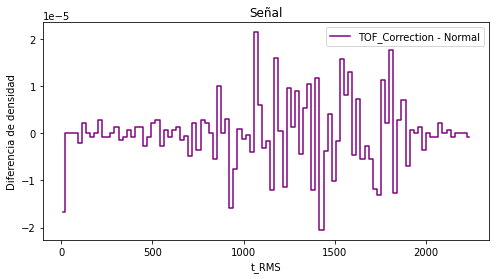

In [198]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS_sig[~np.isnan(t_RMS_sig)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig_TOF[~np.isnan(t_RMS_sig_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='TOF_Correction - Normal')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Señal")
plt.show()

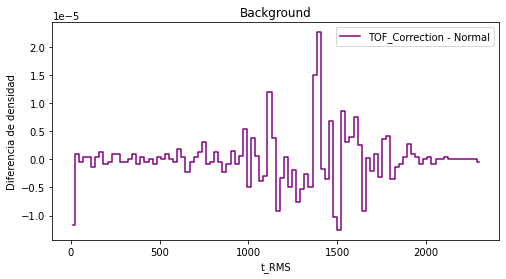

In [199]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS[~np.isnan(t_RMS)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_TOF[~np.isnan(t_RMS_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='TOF_Correction - Normal')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Background")
plt.show()

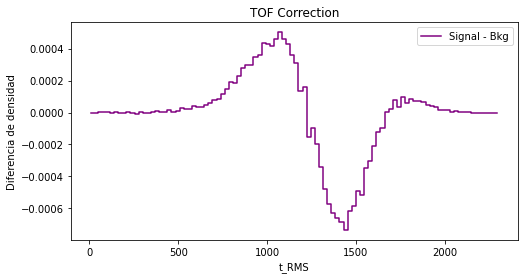

In [205]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS_TOF[~np.isnan(t_RMS_TOF)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig_TOF[~np.isnan(t_RMS_sig_TOF)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='Signal - Bkg')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("TOF Correction")
plt.show()

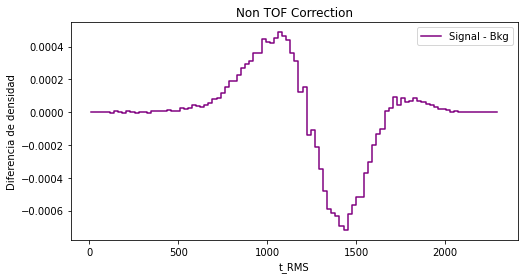

In [206]:
# Calcula los histogramas (ambos con los mismos bins)
counts1, bins = np.histogram(t_RMS[~np.isnan(t_RMS)], bins=100, density=True)
counts2, _ = np.histogram(t_RMS_sig[~np.isnan(t_RMS_sig)], bins=bins, density=True)

# Resta los histogramas
diff = counts2 - counts1

# Calcula los centros de los bins para graficar
bin_centers = 0.5 * (bins[1:] + bins[:-1])

plt.figure(figsize=(8, 4))
plt.plot(bin_centers, diff, drawstyle='steps-mid', color='purple', label='Signal - Bkg')
plt.xlabel('t_RMS')
plt.ylabel('Diferencia de densidad')
plt.legend()
plt.title("Non TOF Correction")
plt.show()